In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [18]:
# Read the data from a CSV file
data = pd.read_csv('data/covid_tweets_2020-2021.csv')
print(data.shape)
data.head(5)

(12391, 29)


,Unnamed: 0,Unnamed: 0.1,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,0,https://twitter.com/persi_giovanni/status/1476...,2021-12-30 23:24:14+00:00,Sei inutile come un tampone rapido. \n\n#Posit...,Sei inutile come un tampone rapido. \n\n#Posit...,1476695654663610372,"{'username': 'persi_giovanni', 'id': 134822023...",0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,"{'longitude': 13.0838725, 'latitude': 43.7262228}","{'fullName': 'Mondolfo, Marche', 'name': 'Mond...","['Positivo', 'Covid', 'megagreenpass', 'lockdo...",NaN
1,1,1,https://twitter.com/annalisatheatro/status/147...,2021-12-30 22:59:03+00:00,VI SBLOCCO UN RICORDO . ERA IL 2019 E BRINDAVA...,VI SBLOCCO UN RICORDO . ERA IL 2019 E BRINDAVA...,1476689319146536960,"{'username': 'annalisatheatro', 'id': 34757913...",0,0,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,NaN,NaN,NaN,NaN,NaN,"{'longitude': 11.9017633, 'latitude': 42.2538717}","{'fullName': 'Vetralla, Lazio', 'name': 'Vetra...","['31dicembre', 'Covid_19', 'Covid', 'italia', ...",NaN
2,2,2,https://twitter.com/DilfirazDegerli/status/147...,2021-12-30 22:18:06+00:00,"Covid-19, Türkiye'de 30 Aralık'ta 139 toplamda...","Covid-19, Türkiye'de 30 Aralık'ta 139 toplamda...",1476679010344185861,"{'username': 'DilfirazDegerli', 'id': 28401298...",0,1,...,[{'previewUrl': 'https://pbs.twimg.com/media/F...,NaN,NaN,NaN,NaN,"[{'username': 'istanbulgercegi', 'id': 2892180...","{'longitude': 26.5279979, 'latitude': 39.1665387}","{'fullName': 'Ayvalık, Balıkesir', 'name': 'Ay...","['COVID19', 'Covid_19', 'Covid', 'Koronavirüs'...",NaN
3,3,3,https://twitter.com/WafaaAlansarya1/status/147...,2021-12-30 21:35:56+00:00,"Moreover, the smart soldiers of Allaah will in...","Moreover, the smart soldiers of Allaah will in...",1476668401787490306,"{'username': 'WafaaAlansarya1', 'id': 13841317...",0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,"{'longitude': 41.8153438, 'latitude': 12.1068662}","{'fullName': 'Yemen', 'name': 'Yemen', 'type':...","['ItIsCosmicAndCovidiousWar', 'Covid']",NaN
4,4,4,https://twitter.com/dedesi_heidinin/status/147...,2021-12-30 17:17:12+00:00,#yeniyıl #yılbaşı #pahalı #dolar #covid #2022 ...,#yeniyıl #yılbaşı #pahalı #dolar #covid #2022 ...,1476603289957502976,"{'username': 'dedesi_heidinin', 'id': 33311944...",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,"{'longitude': 26.7231666, 'latitude': 38.2832034}","{'fullName': 'İzmir, Türkiye', 'name': 'İzmir'...","['yeniyıl', 'yılbaşı', 'pahalı', 'dolar', 'cov...",NaN


In [19]:
data1 = data.groupby(['lang'])['content'].count()
data2 = data.groupby(['lang'])['retweetCount', 'likeCount', 'replyCount'].sum()

C:\Users\Sage\AppData\Local\Temp/ipykernel_2292/1486856709.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data2 = data.groupby(['lang'])['retweetCount', 'likeCount', 'replyCount'].sum()


In [20]:
dataset = pd.merge(data1, data2, how='left', on='lang')
dataset = dataset.rename(columns = {'content': 'tweetCount'}, inplace = False)
dataset = dataset.rename(index = {'en': 'English', 'tr': 'Turkey', 'it': 'Italian', 
                                  'el': 'Greek', 'ar': 'Arabic', 'und': 'Undertermined'}, inplace = False)

In [21]:
dataset.describe().applymap('{:,.2f}'.format)

,tweetCount,retweetCount,likeCount,replyCount
count,49.00,49.00,49.00,49.00
mean,252.88,358.53,"1,959.82",187.16
std,826.93,"1,269.05","7,129.33",711.12
min,1.00,0.00,0.00,0.00
25%,2.00,0.00,1.00,0.00
50%,6.00,2.00,22.00,2.00
75%,30.00,19.00,88.00,10.00
max,"3,924.00","7,226.00","35,892.00","3,661.00"


In [22]:
print('Number of languagues in the dataset:', dataset['tweetCount'].count())

Number of languagues in the dataset: 49


In [23]:
sample_data = dataset.nlargest(6, 'tweetCount')
print('The top 6 tweet count languages:\n', sample_data)

The top 6 tweet count languages:
                tweetCount  retweetCount  likeCount  replyCount
lang                                                          
English              3924          3961      16212        1312
Turkey               3421          3700      32222        3269
Italian              2711          7226      35892        3661
Undertermined        1150           437       2139         173
Greek                 296          1149       5402         257
Arabic                253           690       2105         279


In [25]:
print('{} tweeets were tweeted in {} different languagues in the dataset.' 
      .format(dataset['tweetCount'].sum(), dataset['tweetCount'].count()))
print("'English' had the highest number of tweets in the dataset:", dataset['tweetCount'].max())
print("'Italian' had the highest number of retweets, likes and replies in the dataset: {}, {} and {} respectivley." 
      .format(dataset['retweetCount'].max(), dataset['likeCount'].max(), dataset['replyCount'].max()))

12391 tweeets were tweeted in 49 different languagues in the dataset.
'English' had the highest number of tweets in the dataset: 3924
'Italian' had the highest number of retweets, likes and replies in the dataset: 7226, 35892 and 3661 respectivley.


In [26]:
print('Per every tweet, the number of retweets, likes and replies based on the dataset:')
sample_data[['retweetCount', 'likeCount', 'replyCount']].div(sample_data['tweetCount'], axis=0)

Per every tweet, the number of retweets, likes and replies based on the dataset:


,retweetCount,likeCount,replyCount
lang,,,
English,1.009429,4.131498,0.334353
Turkey,1.081555,9.418883,0.955569
Italian,2.665437,13.239395,1.350424
Undertermined,0.380000,1.860000,0.150435
Greek,3.881757,18.250000,0.868243
Arabic,2.727273,8.320158,1.102767


<AxesSubplot:ylabel='lang'>

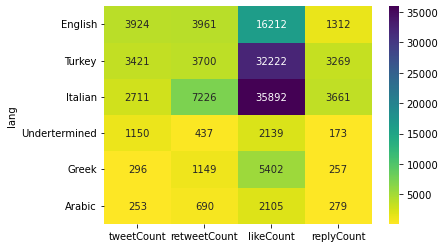

In [27]:
sb.heatmap(sample_data, annot = True, fmt = 'd', cmap='viridis_r')